In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import scipy as ss
import scipy.stats
%matplotlib inline
import itertools
import seaborn as sns
from sklearn.decomposition import PCA
from matplotlib.colors import LinearSegmentedColormap

import visualization_functions as vis
# col1 = "#f93c3c"
# col2 = "#009a7f"
# col3 = "#9fa8ab"
# col5 = "#00490c"
# col4 = "#f4d895"

col1 = "#f34236"
col2 = "#d6c571"
col3 = "#88bc67"
col4 = "#2e8174"
col5 = "#143969"


colors = [col1, col2, col3, col4, col5]
my_cmap = my_cmap = LinearSegmentedColormap.from_list('custom blue', [col5, col4, col2,col1], N=256)

counts_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_counts.csv"
    
rpkm_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
            "data/counts/stranded/2018-04-23_rpkm.csv"
    
study_design_file = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/"\
                    "/data/ref/study_design.csv"

figures_folder = "/Users/annasintsova/git_repos/spatial_dynamics_of_gene_expression_in_response_to_T6SS_attack/figures/"


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]


rpkms = pd.read_csv(rpkm_file, index_col=0)
rpkms.columns = [c.split("_")[0] for c in rpkms.columns]

meta = pd.read_csv(study_design_file, index_col=0)
meta.index = [i.split("S")[1] for i in meta.index]

wt = "WT"
mut = "9C1"

mut_L = "Dienes Line"
wt_L = "Merge"

bh_mut = "Behind Dienes Line"
bh_wt = "Behind Merge"

thirty = "30 min"
zero = "0 min"

samples = {"Case5":"{} | {}".format(wt_L, thirty),
           "Case6":"{} | {}".format(wt_L, zero),
            "Case7":"{} | {} | {}".format(wt, bh_mut, thirty), 
          "Case8":"{} | {} | {}".format(mut, bh_mut, thirty),
          "Case9": "{} | {}".format(mut_L, zero),
          "Case10": "{} | {}".format(mut_L, thirty),
          "Case11": "{} | {} | {}".format(mut, bh_mut, zero),
           "Case12":"{} | {} | {}".format(wt, bh_mut, zero),
          "Case13": "{} | {} | {}".format(wt, bh_wt,zero ),
           "Case14":"{} | {} | {}".format(wt, bh_wt, thirty)}


In [2]:
meta = meta[meta["lane.ID"]!="L1"]
rpkms = rpkms[meta.index]
rpkms_norm =  rpkms.apply(vis.invnorm)
meta["samples"] = [samples[i] for i in meta["group.ID"]]
meta["time.point"] = meta["time.point"].str.replace("0''", "0 min")
meta["time.point"] = meta["time.point"].str.replace("4'", "4 hrs")
meta['position'] = meta['position'].map({'B': "{}|{}".format(wt, bh_wt),
                                        "BH": "{}|{}".format(wt, bh_mut),
                                        "B9":"{}|{}".format(mut, bh_mut),
                                        "L-HI":wt_L,
                                        "L-9C": mut_L})
meta

,lane.ID,group.ID,time.point,strain.ID,position,RIN,samples
76067,L2,Case5,30 min,HI,Merge,6.8,Merge | 30 min
76068,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76069,L2,Case5,30 min,HI,Merge,6.1,Merge | 30 min
76070,L2,Case6,0 min,HI,Merge,6.4,Merge | 0 min
76071,L2,Case6,0 min,HI,Merge,4.5,Merge | 0 min
76072,L2,Case6,0 min,HI,Merge,6.1,Merge | 0 min
76073,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.2,WT | Behind Dienes Line | 30 min
76074,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.3,WT | Behind Dienes Line | 30 min
76075,L2,Case7,30 min,Mix,WT|Behind Dienes Line,6.9,WT | Behind Dienes Line | 30 min
76076,L2,Case8,30 min,Mix,9C1|Behind Dienes Line,5.5,9C1 | Behind Dienes Line | 30 min


In [3]:
sef = ["PMI1117", "PMI1118", "PMI1119", "PMI1120", "PMI1121"]
ids = ["PMI2990", "PMI2991", "PMI2992", "PMI2993", "PMI2994", "PMI2995", "PMI2996"]
pef = ["PMI0750", "PMI0751", "PMI0752",
           "PMI0753", "PMI0754", "PMI0755", "PMI0756", "PMI0757"]


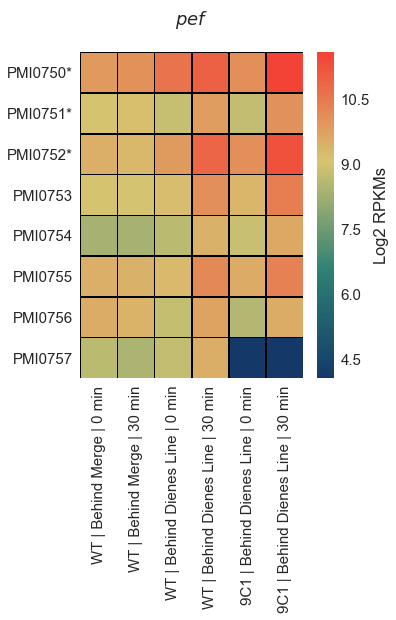

In [9]:
sns.set(font_scale=1.5)
fig = vis.draw_heatmap_of_subset(pef, meta, "$\itpef$\n",
                          rpkms, samples, my_cmap, (5,6), ["Case13", "Case14",
                                                           "Case12", "Case7", "Case11", "Case8"])
stat_sig_9c1 = ["PMI0750", "PMI0751", "PMI0752"]
ax = fig.gca()
new_labels = ["{}*".format(n) if n in stat_sig_9c1 else n for n in pef ]
ax.set_yticklabels(new_labels[::-1]);
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_figure_7a.png"), dpi=300, bbox_inches="tight")

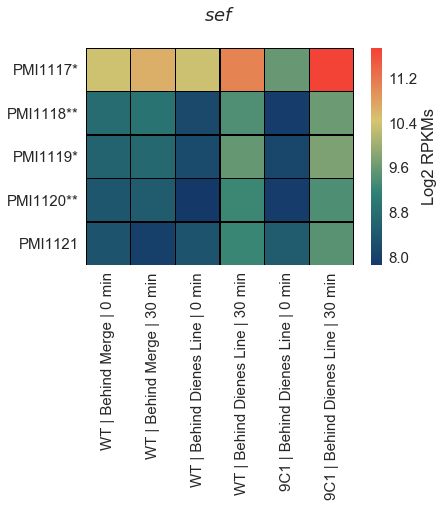

In [10]:
fig = vis.draw_heatmap_of_subset(sef, meta, "$\itsef$\n",
                          rpkms, samples, my_cmap, (6,4), ["Case13", "Case14",
                                                           "Case12", "Case7", "Case11", "Case8"])
ax = fig.gca()
stat_sig_both =["PMI1118", "PMI1120"]
stat_sig_9c1 = ["PMI1117", "PMI1119"]
new_labels = []
for n in sef:
    if n in stat_sig_both:
        new_labels.append("{}**".format(n))
    elif n in stat_sig_9c1:
        new_labels.append("{}*".format(n))
    else:
        new_labels.append(n)

ax.set_yticklabels(new_labels[::-1]);
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_figure_7b.png"), dpi=300, bbox_inches="tight")

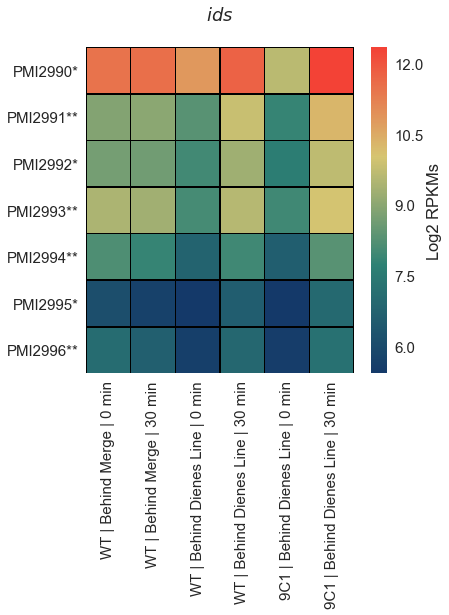

In [11]:
fig = vis.draw_heatmap_of_subset(ids, meta, "$\itids$\n",
                          rpkms, samples, my_cmap, (6,6), ["Case13", "Case14",
                                                           "Case12", "Case7", "Case11", "Case8"])

stat_sig_both = ["PMI2991", "PMI2993", "PMI2994", "PMI2996"]
stat_sig_9c1 = ["PMI2990", "PMI2992", "PMI2995"]
ax = fig.gca()
new_labels = []
for n in ids:
    if n in stat_sig_both:
        new_labels.append("{}**".format(n))
    elif n in stat_sig_9c1:
        new_labels.append("{}*".format(n))
    else:
        new_labels.append(n)
ax.set_yticklabels(new_labels[::-1]);
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_figure_7c.png"), dpi=300, bbox_inches="tight")

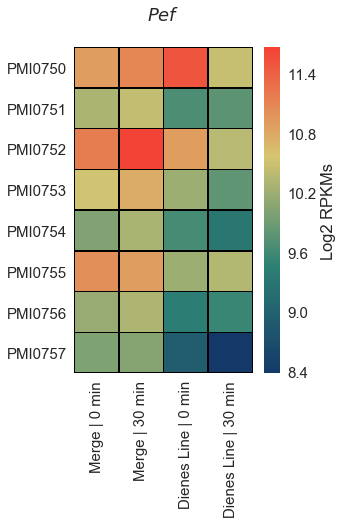

In [14]:
fig = vis.draw_heatmap_of_subset(pef, meta, "$\itPef$\n",
                          rpkms, samples, my_cmap, (4,6), ["Case6", "Case5", "Case9", "Case10"])
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_supplemental_figure_2a.png"), dpi=300, bbox_inches="tight")

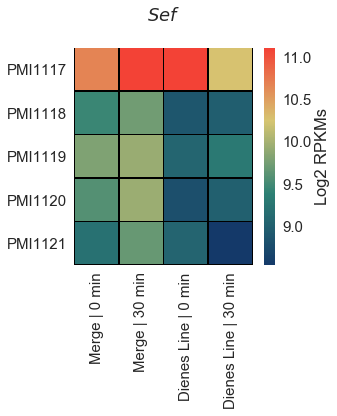

In [15]:
fig = vis.draw_heatmap_of_subset(sef, meta, "$\itSef$\n",
                          rpkms, samples, my_cmap, (4,4), ["Case6", "Case5", "Case9", "Case10"])
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_supplemental_figure_2b.png"), dpi=300, bbox_inches="tight")

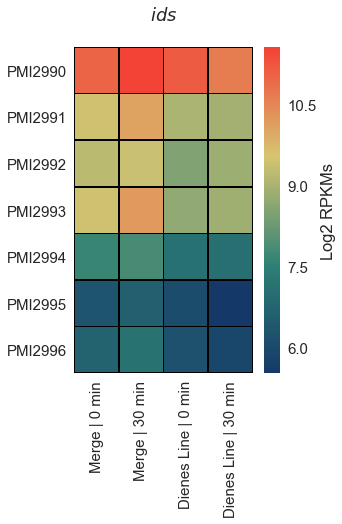

In [16]:
fig = vis.draw_heatmap_of_subset(ids, meta, "$\itids$\n",
                          rpkms, samples, my_cmap, (4,6), ["Case6", "Case5", "Case9", "Case10"])
fig.savefig(os.path.join(figures_folder, "2018-07-03-proteus_rnaseq_supplemental_figure_2c.png"), dpi=300, bbox_inches="tight")